In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_features = pd.read_csv(...)
train_labels = pd.read_csv(...)
test_features = pd.read_csv(...)

In [28]:
result = pd.DataFrame({'pid': test_features.iloc[0::12, 0].values})
testing_features = ['LABEL_BaseExcess','LABEL_Fibrinogen','LABEL_AST','LABEL_Alkalinephos','LABEL_Bilirubin_total','LABEL_Lactate','LABEL_TroponinI','LABEL_SaO2','LABEL_Bilirubin_direct','LABEL_EtCO2', 'LABEL_Sepsis', 'LABEL_RRate','LABEL_ABPm','LABEL_SpO2','LABEL_Heartrate']

In [4]:
train_features = train_features.sort_values(by=['pid','Time'])
train_labels = train_labels.sort_values(by=['pid'])
test_features = test_features.sort_values(by=['pid','Time'])

In [10]:
def make_features(inp):
    inp = inp.to_numpy()
    finished2 = np.empty((int(inp.shape[0]/12), 70))
    for index in range(int(inp.shape[0] / 12)):
        data_without = inp[index*12 : (index+1) * 12, 2:] 
        finished2[index, :35] = np.nanmean(data_without, axis=0)
        finished2[index, 35:] = np.nanvar(data_without, axis=0)
    return np.array(finished2)

In [11]:
train_features_new = make_features(train_features)
test_feat_new = make_features(test_features)

C:\Users\erics\AppData\Local\Temp/ipykernel_18332/2408358360.py:6: RuntimeWarning: Mean of empty slice
  finished2[index, :35] = np.nanmean(data_without, axis=0)
C:\Users\erics\AppData\Local\Temp/ipykernel_18332/2408358360.py:7: RuntimeWarning: Degrees of freedom <= 0 for slice.
  finished2[index, 35:] = np.nanvar(data_without, axis=0)


In [14]:
labels = train_labels
labels.pop("pid")
labels = labels.to_numpy()

In [16]:
from sklearn.impute import SimpleImputer
imputer2 = SimpleImputer(strategy='median')
train_feat_MEDIAN = imputer2.fit_transform(train_features_new)

In [17]:
test_feat_MEDIAN = imputer2.fit_transform(test_feat_new)

In [18]:
train_feat_MEDIAN = np.float32(train_feat_MEDIAN)

In [19]:
train_feat_MEDIAN = np.nan_to_num(train_feat_MEDIAN, nan=0.0, posinf=None, neginf=None)

In [20]:
True in np.isnan(train_feat_MEDIAN)

False

In [21]:
train_feat_MEDIAN.dtype

dtype('float32')

In [22]:
True in np.isinf(train_feat_MEDIAN)

False

In [23]:
test_feat_MEDIAN = np.float32(test_feat_MEDIAN)
test_feat_MEDIAN = np.nan_to_num(test_feat_MEDIAN, nan=0.0, posinf=None, neginf=None)

Subtask 1
---

In [24]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(max_depth=3))])

y = labels[2000:, 0]
X = train_feat_MEDIAN[2000:]

pipe.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(max_depth=3))])

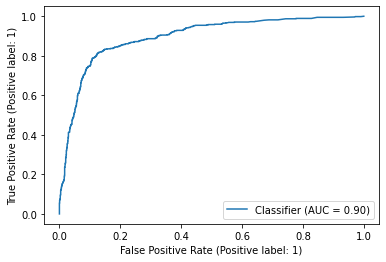

In [25]:
y_pred = pipe.predict_proba(train_feat_MEDIAN[:2000])[:,1]
RocCurveDisplay.from_predictions(labels[:2000, 0], y_pred)
plt.show()

In [26]:
from sklearn.multioutput import MultiOutputClassifier
y = labels[:,:10]
model = MultiOutputClassifier(pipe).fit(train_feat_MEDIAN, y)

In [27]:
from sklearn.metrics import roc_auc_score
y_predict = model.predict_proba(train_feat_MEDIAN)
y_predict = np.transpose(np.asarray(y_predict)[:,:,1])
roc_auc_score(y, y_predict, average=None)

array([0.89024827, 0.79567113, 0.72188586, 0.72431752, 0.72396751,
       0.77947172, 0.88238255, 0.80733398, 0.74951883, 0.89083309])

In [29]:
y_predict = model.predict_proba(test_feat_MEDIAN)
y_pred = np.transpose(np.asarray(y_predict)[:,:,1])

for index in range(10):
    result[testing_features[index]] = y_pred[:,index]


In [30]:
result

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2
0,0,0.719129,0.336132,0.586177,0.514293,0.602836,0.434753,0.207093,0.501579,0.133332,0.301036
1,3,0.307114,0.071991,0.198927,0.196417,0.201354,0.141528,0.268599,0.145381,0.028602,0.266793
2,5,0.309718,0.071765,0.195225,0.192484,0.198253,0.143697,0.272040,0.150462,0.028358,0.268612
3,7,0.672130,0.708558,0.801386,0.772905,0.823155,0.342320,0.175612,0.516837,0.441714,0.274308
4,9,0.375120,0.094435,0.227235,0.231575,0.228212,0.158296,0.261675,0.174122,0.037922,0.265135
...,...,...,...,...,...,...,...,...,...,...,...
12659,31647,0.309090,0.071765,0.195225,0.192350,0.197954,0.143697,0.267408,0.148619,0.028604,0.274574
12660,31649,0.616759,0.095963,0.289775,0.309292,0.317977,0.427522,0.261836,0.414983,0.041358,0.301135
12661,31651,0.624048,0.106173,0.230666,0.231798,0.228406,0.272313,0.228218,0.393379,0.033601,0.260186
12662,31652,0.309860,0.088317,0.230186,0.226317,0.228600,0.155485,0.101041,0.165877,0.029033,0.265559


Subtask 2
---

In [33]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(max_depth=3, class_weight='balanced'))])

y = labels[2000:, 10]
X = train_feat_MEDIAN[2000:]

pipe.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=3))])

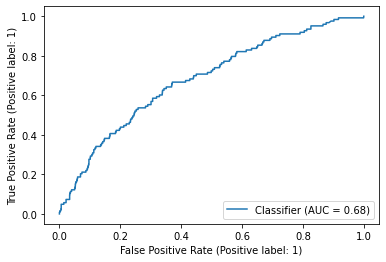

In [34]:
y_pred = pipe.predict_proba(train_feat_MEDIAN[:2000])[:,1]
RocCurveDisplay.from_predictions(labels[:2000, 10], y_pred)
plt.show()

In [35]:
y_pred = pipe.predict_proba(test_feat_MEDIAN)[:,1]

result[testing_features[10]] = y_pred

In [36]:
result

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis
0,0,0.719129,0.336132,0.586177,0.514293,0.602836,0.434753,0.207093,0.501579,0.133332,0.301036,0.543409
1,3,0.307114,0.071991,0.198927,0.196417,0.201354,0.141528,0.268599,0.145381,0.028602,0.266793,0.402839
2,5,0.309718,0.071765,0.195225,0.192484,0.198253,0.143697,0.272040,0.150462,0.028358,0.268612,0.411991
3,7,0.672130,0.708558,0.801386,0.772905,0.823155,0.342320,0.175612,0.516837,0.441714,0.274308,0.524631
4,9,0.375120,0.094435,0.227235,0.231575,0.228212,0.158296,0.261675,0.174122,0.037922,0.265135,0.470339
...,...,...,...,...,...,...,...,...,...,...,...,...
12659,31647,0.309090,0.071765,0.195225,0.192350,0.197954,0.143697,0.267408,0.148619,0.028604,0.274574,0.402170
12660,31649,0.616759,0.095963,0.289775,0.309292,0.317977,0.427522,0.261836,0.414983,0.041358,0.301135,0.529509
12661,31651,0.624048,0.106173,0.230666,0.231798,0.228406,0.272313,0.228218,0.393379,0.033601,0.260186,0.470392
12662,31652,0.309860,0.088317,0.230186,0.226317,0.228600,0.155485,0.101041,0.165877,0.029033,0.265559,0.437528


Subtask 3
---

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
#Indeces 11, 12, 13, 14
y = labels[2000:, 11]
X = train_feat_MEDIAN[2000:]

regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X, y)


RandomForestRegressor(max_depth=3, random_state=0)

In [39]:
y_prediction = regr.predict(train_feat_MEDIAN[:2000])
loss = r2_score(labels[:2000, 11], y_prediction)
loss

0.3921075195295367

In [45]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
#Indeces 11, 12, 13, 14
y = labels[:,11:]
X = train_feat_MEDIAN[:]

regr = RandomForestRegressor(max_depth=3, random_state=0)
model = MultiOutputRegressor(regr).fit(X, y)

In [46]:
y_prediction = model.predict(test_feat_MEDIAN)

for index in range(4):
    result[testing_features[index + 11]] = y_prediction[:,index]

In [47]:
result

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,0,0.719129,0.336132,0.586177,0.514293,0.602836,0.434753,0.207093,0.501579,0.133332,0.301036,0.543409,15.414150,82.965146,98.523316,83.437676
1,3,0.307114,0.071991,0.198927,0.196417,0.201354,0.141528,0.268599,0.145381,0.028602,0.266793,0.402839,17.872709,88.253561,96.079354,95.364845
2,5,0.309718,0.071765,0.195225,0.192484,0.198253,0.143697,0.272040,0.150462,0.028358,0.268612,0.411991,19.042810,74.072122,95.964119,71.172536
3,7,0.672130,0.708558,0.801386,0.772905,0.823155,0.342320,0.175612,0.516837,0.441714,0.274308,0.524631,17.906816,88.202556,98.118379,92.835753
4,9,0.375120,0.094435,0.227235,0.231575,0.228212,0.158296,0.261675,0.174122,0.037922,0.265135,0.470339,20.131770,88.253561,95.964119,91.760143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12659,31647,0.309090,0.071765,0.195225,0.192350,0.197954,0.143697,0.267408,0.148619,0.028604,0.274574,0.402170,16.893925,68.112892,96.596632,72.244363
12660,31649,0.616759,0.095963,0.289775,0.309292,0.317977,0.427522,0.261836,0.414983,0.041358,0.301135,0.529509,15.985976,83.038454,97.130890,88.007717
12661,31651,0.624048,0.106173,0.230666,0.231798,0.228406,0.272313,0.228218,0.393379,0.033601,0.260186,0.470392,17.778620,78.527877,98.523316,84.865961
12662,31652,0.309860,0.088317,0.230186,0.226317,0.228600,0.155485,0.101041,0.165877,0.029033,0.265559,0.437528,19.167443,94.123403,97.241622,111.251824


In [48]:
import pandas as pd

# suppose df is a pandas dataframe containing the result
result.to_csv('prediction_Jan_Eric2.zip', index=False, float_format='%.3f', compression='zip')